In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Colab\ Notebooks/tusimple.zip

Streaming output truncated to the last 5000 lines.
  inflating: TUSimple/train_set/seg_label/0313-2/115/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1150/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11520/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1155/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11580/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1160/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11640/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1165/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1170/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11700/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1175/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11760/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1180/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/11820/20.png  
  inflating: TUSimple/train_set/seg_label/0313-2/1185/20.png  

**Initialization**

In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Generate Masks

In [ ]:
%matplotlib inline

json_gt = [json.loads(line) for line in open('/content/TUSimple/train_set/label_data_0601.json')]
print(np.shape(json_gt))

image_names = []
mask_names = []

for i in range(np.shape(json_gt)[0]):
  gt = json_gt[i]
  gt_lanes = gt['lanes']
  y_samples = gt['h_samples']
  raw_file = gt['raw_file']
  address = '/content/TUSimple/train_set/'+raw_file
  image_names.append(address)
  image = plt.imread(address)
  #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

  #print(np.shape(image))
  #image = image.resize((200, 200,3))
  gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
  # Create an empty mask
  mask = np.zeros(image.shape[:2], dtype=np.uint8)
  # Draw a rectangle on the mask
  for lane in gt_lanes_vis:
      for pt in lane:
          cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

  mask = mask.astype(np.uint8)
  #print(np.shape(mask))

  tosave = Image.fromarray(mask)
  mask_add = '/content/TUSimple/Masks/'+raw_file[11:30]+'.png'
  mask_names.append(mask_add)
  tosave.save(mask_add)


print(np.shape(image_names))
print(np.shape(mask_names))

(410,)
(410,)
(410,)


In [ ]:
json_gt = [json.loads(line) for line in open('/content/TUSimple/train_set/label_data_0313.json')]
print(np.shape(json_gt))

for i in range(np.shape(json_gt)[0]):
  gt = json_gt[i]
  gt_lanes = gt['lanes']
  y_samples = gt['h_samples']
  raw_file = gt['raw_file']
  address = '/content/TUSimple/train_set/'+raw_file
  image_names.append(address)
  image = plt.imread(address)
  #image = cv2.resize(image, dsize=(320, 180), interpolation=cv2.INTER_CUBIC)

  #print(np.shape(image))
  #image = image.resize((200, 200,3))
  gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
  # Create an empty mask
  mask = np.zeros(image.shape[:2], dtype=np.uint8)
  # Draw a rectangle on the mask
  for lane in gt_lanes_vis:
      for pt in lane:
          cv2.polylines(mask, np.int32([lane]), isClosed=False, color=(255,255,255), thickness=5)

  mask = mask.astype(np.uint8)
  #print(np.shape(mask))

  tosave = Image.fromarray(mask)
  if len(raw_file) == 22:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:15]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 23:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:16]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 24:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:17]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 25:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:18]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)
  elif len(raw_file) == 26:
    mask_add = '/content/TUSimple/Masks/'+raw_file[13:19]+'.png'
    mask_names.append(mask_add)
    tosave.save(mask_add)

# Select Dataset

In [ ]:
num_images = 400

image_names_subset = image_names[0:num_images]
images = [cv2.resize(cv2.imread(img), dsize=(320, 180), interpolation=cv2.INTER_CUBIC) for img in image_names_subset]
#images = cv2.resize(images, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)

image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 4)

mask_names_subset = mask_names[0:num_images]
masks = [cv2.resize(cv2.imread(mask, 0), dsize=(320, 180), interpolation=cv2.INTER_NEAREST) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (400, 180, 320, 3, 1)
Mask data shape is:  (400, 180, 320, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


**Normalization**

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

**Train / Test Split**

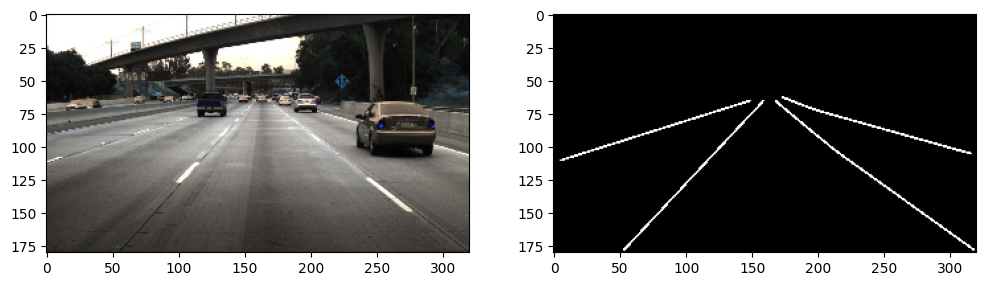

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,:,0])
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

# UNet


In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate

def resize_like(input_tensor, ref_tensor): # resizes input tensor wrt. ref_tensor
    H, W = ref_tensor.get_shape()[1], ref_tensor.get_shape()[2]
    return tf.image.resize(input_tensor, [H, W])

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = resize_like(x, skip_features)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model



# Input Size

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(input_shape)

(180, 320, 3)


# Define Precision, Recall and F-1 Score Metrics

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Compile UNet

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy',f1_m])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 180, 320, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 180, 320, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

# Train UNet

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 8,
                    verbose=1,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/30
40/40 [==============================] - 47s 500ms/step - loss: 0.1779 - accuracy: 0.9671 - f1_m: 0.0065 - val_loss: 239.5778 - val_accuracy: 0.4169 - val_f1_m: 0.0377
Epoch 2/30
40/40 [==============================] - 19s 470ms/step - loss: 0.0946 - accuracy: 0.9804 - f1_m: 0.0127 - val_loss: 0.9697 - val_accuracy: 0.8557 - val_f1_m: 0.0047
Epoch 3/30
40/40 [==============================] - 20s 506ms/step - loss: 0.0804 - accuracy: 0.9809 - f1_m: 0.1300 - val_loss: 0.1103 - val_accuracy: 0.9805 - val_f1_m: 0.0000e+00
Epoch 4/30
40/40 [==============================] - 20s 495ms/step - loss: 0.0709 - accuracy: 0.9813 - f1_m: 0.1985 - val_loss: 0.0970 - val_accuracy: 0.9805 - val_f1_m: 0.0000e+00
Epoch 5/30
40/40 [==============================] - 21s 530ms/step - loss: 0.0644 - accuracy: 0.9817 - f1_m: 0.2522 - val_loss: 0.0996 - val_accuracy: 0.9805 - val_f1_m: 0.0000e+00
Epoch 6/30
40/40 [==============================] - 21s 523ms/step - loss: 0.0596 - accuracy: 0.9820 

# Save Model

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/400image30epochsFinal.hdf5')

# Plot Loss and Accuracy

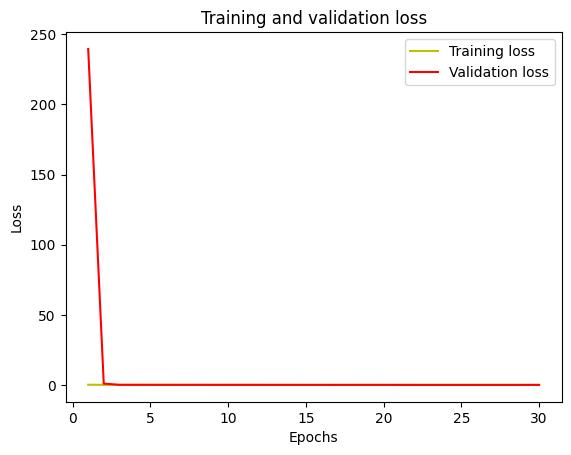

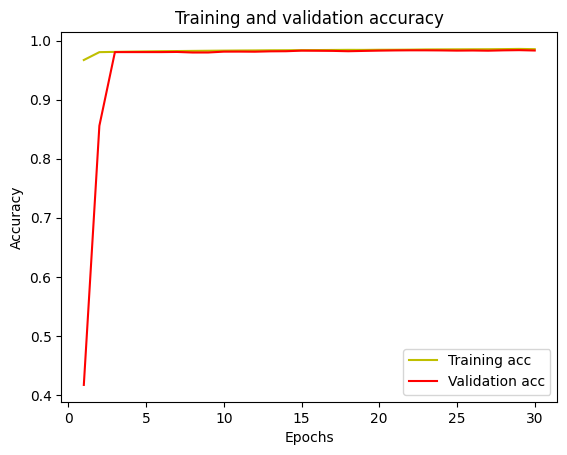

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Load Model

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Colab Notebooks/saved_models/400image30epochsFinal.hdf5", compile=False)

# Evaluate Model

In [ ]:
#Prediction
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.4

3/3 [==============================] - 1s 501ms/step


**IoU Metric**

In [ ]:
from tensorflow.keras.metrics import MeanIoU

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.6720297


# Test Network

(1, 180, 320, 3, 1)
1/1 [==============================] - 0s 26ms/step


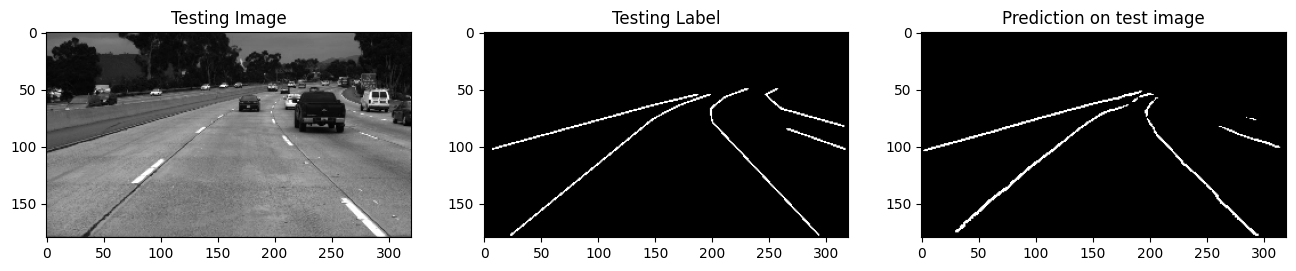

In [ ]:
threshold = 0.4
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.4).astype(np.uint8)
#target = []
#[a,b] = np.shape(prediction[:,:])
#for i in range(a):
#  for j in range(b):
#    if prediction[i,j] >=0:
#      target.append([i,j])
#    else:
#      continue
#for lane in prediction>0:
#  for pt in lane:
#cv2.polylines(prediction, np.int32([target]), isClosed=False, color=(255,255,255), thickness=5)

#print(target)
#print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

# Other Methods

**ENet**

In [ ]:
model = ENet(input_shape=(720, 1280, 3), num_classes=2)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, \
    Conv2DTranspose, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the ENet model
def initial_block(inputs):
    conv = Conv2D(13, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(inputs)
    concat = concatenate([conv, pool], axis=3)
    return concat

def bottleneck(inputs, output_size, internal_scale=4, asymmetric=False, dilated=False, downsample=False,
               dropout_rate=0.1):
    internal = output_size // internal_scale

    # Branch 1
    path_1 = Conv2D(internal, kernel_size=(1, 1))(inputs)
    path_1 = BatchNormalization()(path_1)
    path_1 = Activation('relu')(path_1)

    # Branch 2
    if asymmetric:
        path_2 = Conv2D(internal, kernel_size=(1, 5), padding='same')(inputs)
        path_2 = Conv2D(internal, kernel_size=(5, 1), padding='same')(path_2)
    elif dilated:
        path_2 = Conv2D(internal, kernel_size=(3, 3), dilation_rate=(2, 2), padding='same')(inputs)
    else:
        path_2 = Conv2D(internal, kernel_size=(3, 3), padding='same')(inputs)
    path_2 = BatchNormalization()(path_2)
    path_2 = Activation('relu')(path_2)

    # Merge branches
    merged = concatenate([path_1, path_2], axis=3)

    # Branch 3
    outputs = Conv2D(output_size, kernel_size=(1, 1))(merged)
    outputs = BatchNormalization()(outputs)

    # Dropout
    if downsample:
        outputs = Dropout(rate=dropout_rate)(outputs)

    # Skip connection
    if downsample:
        inputs = Conv2D(output_size, kernel_size=(1, 1))(inputs)
        inputs = BatchNormalization()(inputs)
        outputs = concatenate([inputs, outputs], axis=3)

    # Activation
    outputs = Activation('relu')(outputs)

    return outputs

def downsample(inputs, output_size, dropout_rate=0.1):
    outputs = bottleneck(inputs, output_size, downsample=True, dropout_rate=dropout_rate)
    outputs = bottleneck(outputs, output_size, dropout_rate=dropout_rate)
    return outputs

def upsample(inputs, output_size, dropout_rate=0.1):
    outputs = Conv2DTranspose(output_size, kernel_size=(3, 3), strides=(2, 2), padding='same')(inputs)
    outputs = BatchNormalization()(outputs)
    outputs = Activation('relu')(outputs)
    outputs = bottleneck(outputs, output_size, dropout_rate=dropout_rate)
    outputs = bottleneck(outputs, output_size, dropout_rate=dropout_rate)
    return outputs

def ENet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial block
    x = initial_block(inputs)

    # Stage 1
    x = downsample(x, 64)
    for _ in range(4):
        x = bottleneck(x, 64)

    # Stage 2
    x = downsample(x, 128)
    for _ in range(2):
        x = bottleneck(x, 128, asymmetric=True)
        x = bottleneck(x, 128, dilated=True)
        x = bottleneck(x, 128, asymmetric=True)
        x = bottleneck(x, 128, dilated=True)

    # Stage 3
    x = downsample(x, 256)
    for _ in range(4):
        x = bottleneck(x, 256)

    # Stage 4
    x = upsample(x, 128)
    for _ in range(2):
        x = bottleneck(x, 128, asymmetric=True)
        x = bottleneck(x, 128, dilated=True)
        x = bottleneck(x, 128, asymmetric=True)
        x = bottleneck(x, 128, dilated=True)

    # Stage 5
    x = upsample(x, 64)
    for _ in range(4):
        x = bottleneck(x, 64)

    # Output layer
    x = Conv2DTranspose(num_classes, kernel_size=(2, 2), strides=(2, 2), padding='same')(x)
    outputs = Activation('softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

**LaneNet**

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Define the LaneNet model
inputs = Input(shape=(720, 1280, 3))

# Encoder
conv1 = Conv2D(64, 3, padding='same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size=(1, 1))(conv1)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, padding='same', activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, padding='same', activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(1024, 3, padding='same', activation='relu')(pool4)

# Decoder
conv6 = Conv2D(512, 3, padding='same', activation='relu')(conv5)
upsample1 = UpSampling2D(size=(2, 2))(conv6)
conv7 = Conv2D(256, 3, padding='same', activation='relu')(upsample1)
upsample2 = UpSampling2D(size=(2, 2))(conv7)
conv8 = Conv2D(128, 3, padding='same', activation='relu')(upsample2)
upsample3 = UpSampling2D(size=(2, 2))(conv8)
conv9 = Conv2D(64, 3, padding='same', activation='relu')(upsample3)
conv10 = Conv2D(2, 1, padding='valid', activation='softmax')(conv9)

model = Model(inputs=inputs, outputs=conv10)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 720, 1280, 3)]    0         
                                                                 
 conv2d_40 (Conv2D)          (None, 720, 1280, 64)     1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 720, 1280, 64)    0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 720, 1280, 128)    73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 360, 640, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 360, 640, 256)     2951

**ChatGPT Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Set batch size and number of epochs
batch_size = 32
num_epochs = 10

# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1)

# Load the TuSimple dataset
train_generator = X_train,
target_size=(720, 1280),
batch_size=batch_size,
class_mode='input',
classes=['images', 'labels']
# Define the neural network model
inputs = layers.Input(shape=(720, 1280, 3))
conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
pool1 = layers.MaxPooling2D((2, 2))(conv1)
conv2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)
conv3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
pool3 = layers.MaxPooling2D((2, 2))(conv3)
up4 = layers.Conv2DTranspose(64, (2, 2), strides=(4, 4), padding='same')(pool3)
merge4 = layers.concatenate([conv2, up4], axis=-1)
conv4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge4)
up5 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv4)
merge5 = layers.concatenate([conv1, up5], axis=-1)
conv5 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(merge5)
outputs = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(conv5)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Define the loss function and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 720, 1280,   0           []                               
                                3)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 720, 1280, 3  896         ['input_1[0][0]']                
                                2)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 360, 640, 32  0           ['conv2d[0][0]']                 
                                )                                                             

**chatGPT model 2**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the deep neural network
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(720, 1280, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(720*1280, activation='sigmoid'),
    layers.Reshape((720, 1280, 1))
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 718, 1278, 32)     896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 359, 639, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 357, 637, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 178, 318, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 176, 316, 128)     73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 88, 158, 128)     0